# Approximating Functions

### This notebook shows the decomposition of a polynomial through a Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-20,20,10000)

T = 8
harmonics = 15

In [3]:
#Square Wave function
def SquareWave(x):
    global T
    lowerBoundLeft = (-T/2)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T/2)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T/2
            lowerBoundRight -= T/2
            upperBoundLeft += T/2
            upperBoundRight += T/2
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1

def beta_n(n):
    n = int(n)
    if (n%2 != 0):
        return 4/(np.pi*n)
    else:
        return 0

def omega_n(n):
    global T
    omega_n = (2*np.pi*n)/T
    return omega_n

# Fourier Series function
def FourierSeries(n_max,x):
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums + beta_n(n)*np.sin(omega_n(n)*x)
        except:
            print("pass")
            pass
    return partialSums

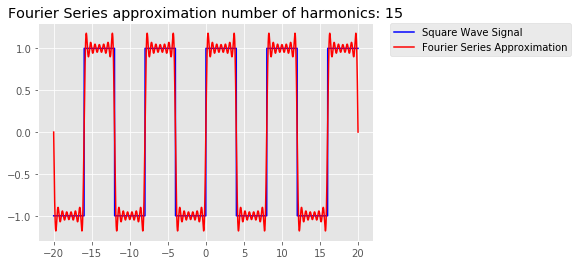

In [4]:
y = []
f = []
for i in x:
    y.append(SquareWave(i))
    f.append(FourierSeries(harmonics,i))


plt.style.use("ggplot")
plt.plot(x,y,color="blue",label="Square Wave Signal")
plt.plot(x,f,color="red",label="Fourier Series Approximation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title("Fourier Series approximation number of harmonics: "+str(harmonics))
plt.show()